In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
import seaborn as sns
import matplotlib as mpl
from dateutil.parser import parse
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
from random import randrange
init_notebook_mode(connected=True)
cf.go_offline()
rcParams['figure.figsize'] = 10,6
import scipy.io as sio
from scipy import fft, arange, signal
plt.style.use('seaborn-poster')
#taling data from nc file
import xarray as xr
ds = xr.open_dataset('C:/Users/rakshit jain/Downloads/inter-999-interpol.nc')
df = ds.to_dataframe()
df.head()

,tempr,ap,ws,wd,rh,blizzard
obstime,,,,,,
2016-06-02 00:00:00,-13.58,966.75,15.42,76.03,49.40,0.0
2016-06-02 01:00:00,-13.95,966.69,14.87,77.85,50.22,0.0
2016-06-02 02:00:00,-13.96,966.83,13.08,77.47,49.27,0.0
2016-06-02 03:00:00,-14.16,967.02,12.83,78.15,49.02,0.0
2016-06-02 04:00:00,-14.49,967.24,13.35,79.85,49.33,0.0


In [5]:
#malking new coloumns from obstime
df['time']= df.index.map(lambda x: str(x).split()[1].split(':')[0])
df['month']= df.index.map(lambda x: str(x).split()[0].split('-')[1])
df['year']= df.index.map(lambda x: str(x).split()[0].split('-')[0])
df['date']= df.index.map(lambda x: str(x).split()[0])
df['year-month']=df['year']+'-'+df['month']
df.head()

,tempr,ap,ws,wd,rh,blizzard,time,month,year,date,year-month
obstime,,,,,,,,,,,
2016-06-02 00:00:00,-13.58,966.75,15.42,76.03,49.40,0.0,00,06,2016,2016-06-02,2016-06
2016-06-02 01:00:00,-13.95,966.69,14.87,77.85,50.22,0.0,01,06,2016,2016-06-02,2016-06
2016-06-02 02:00:00,-13.96,966.83,13.08,77.47,49.27,0.0,02,06,2016,2016-06-02,2016-06
2016-06-02 03:00:00,-14.16,967.02,12.83,78.15,49.02,0.0,03,06,2016,2016-06-02,2016-06
2016-06-02 04:00:00,-14.49,967.24,13.35,79.85,49.33,0.0,04,06,2016,2016-06-02,2016-06


In [6]:
# plotting variation of temperature over year in form of heat map
df_year= df.pivot_table(index='year', columns= 'time', values='tempr')
df_year.iplot(kind='heatmap', colorscale='Rdbu',xaxis_title='year',yaxis_title='tempr',title= 'variation of temperature over years')


In [7]:
# plotting variation of temperature over months in heatmap
df_month= df.pivot_table(index='month', columns= 'time', values='tempr')
df_month.iplot(kind='heatmap', colorscale='Rdbu',xaxis_title='month',yaxis_title='tempr',title= 'variation of temperature over months')

In [8]:
# diurnal variations
df_temp= df.pivot_table(index='time', columns='month', values='tempr')
df_ap= df.pivot_table(index='time', columns='month', values='ap')
df_ws= df.pivot_table(index='time', columns='month', values='ws')
df_wd= df.pivot_table(index='time', columns='month', values='wd')


In [9]:
df_temp.iplot(xaxis_title='time',yaxis_title='tempr',title= 'Diurnal variation of temperature')

In [10]:
df_ws.iplot(xaxis_title='time',yaxis_title='wind speed',title= 'Diurnal variation of wind speed')


In [11]:
df_ap.iplot(xaxis_title='time',yaxis_title='air pressure',title= 'Diurnal variation of air pressure')

In [12]:
df_wd.iplot(xaxis_title='time',yaxis_title='wind direction',title= 'Diurnal variation of wind direction')

In [13]:
#grouping by month
df1= df.groupby('month', as_index=True).mean()
df1.head()

,tempr,ap,ws,wd,rh,blizzard
month,,,,,,
01,0.899447,982.373289,9.769243,93.633945,56.082639,0.001797
02,-2.447721,982.813333,12.573490,79.405722,59.212912,0.011988
03,-8.555826,982.290704,14.089696,83.839045,60.249612,0.000000
04,-12.704415,981.829180,11.845249,87.743418,60.282042,0.007069
05,-14.349993,982.259722,15.701275,81.271091,56.749532,0.057814


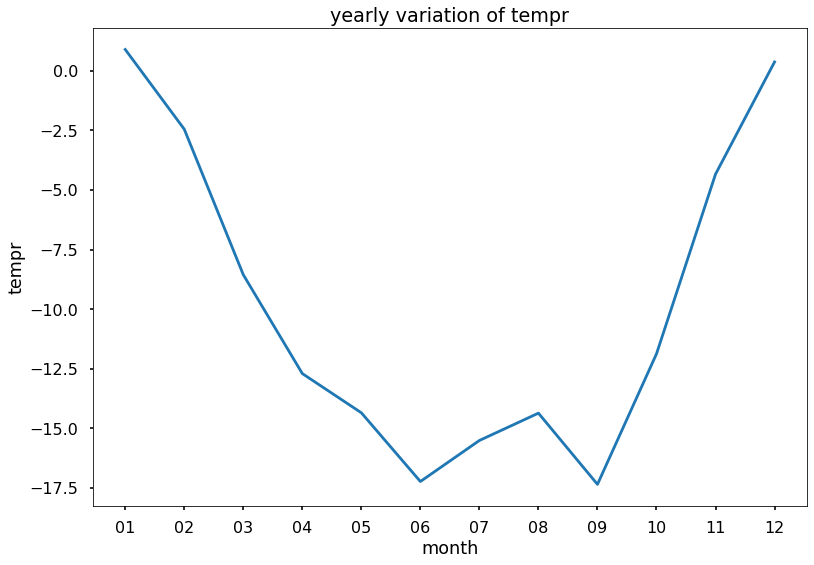

In [14]:
# plotting yearly variation of temperature 
plt.xlabel('month')
plt.ylabel('tempr')
plt.title('yearly variation of tempr')
plt.plot(df1.tempr)

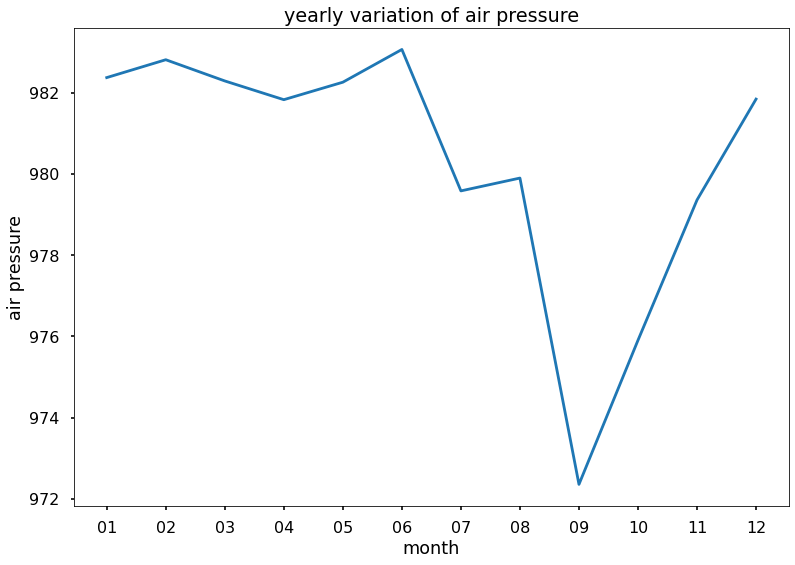

In [15]:
# plotting yearly variation of air pressure
plt.xlabel('month')
plt.ylabel('air pressure')
plt.title('yearly variation of air pressure')
plt.plot(df1.ap)

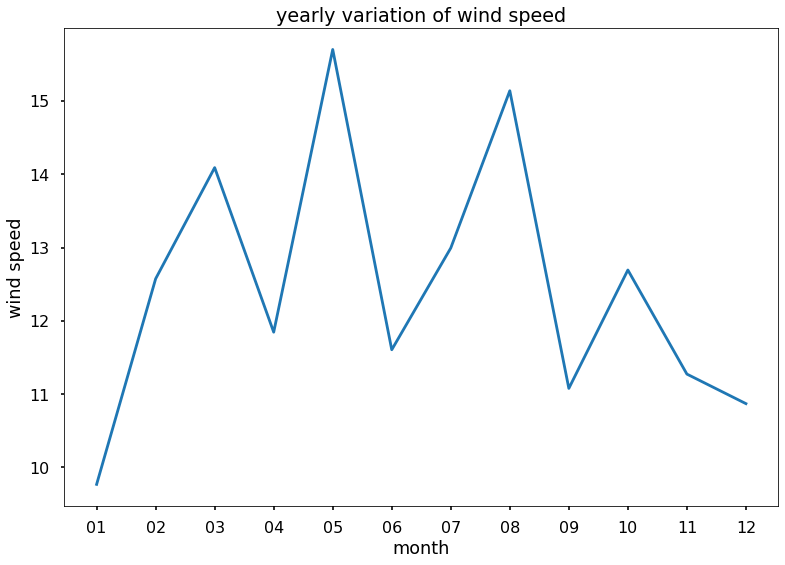

In [16]:
# plotting yearly variation of wind speed
plt.xlabel('month')
plt.ylabel('wind speed')
plt.title('yearly variation of wind speed')
plt.plot(df1.ws)

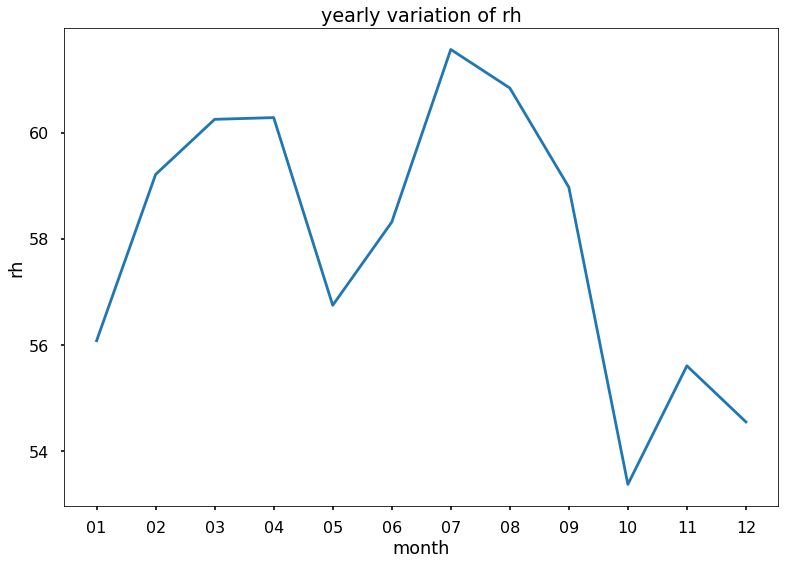

In [17]:
# plotting yearly variation of rh
plt.xlabel('month')
plt.ylabel('rh')
plt.title('yearly variation of rh')
plt.plot(df1.rh)

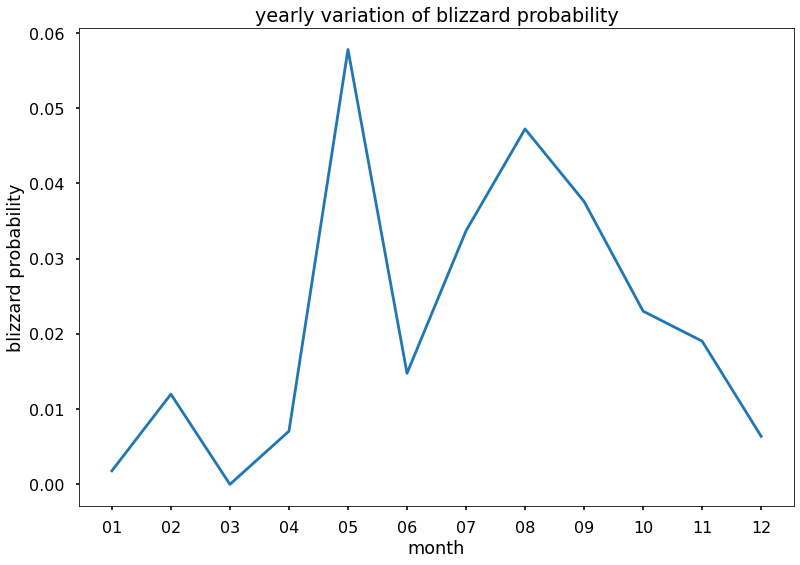

In [18]:
# plotting yearly variation of blizzard probability
plt.xlabel('month')
plt.ylabel('blizzard probability')
plt.title('yearly variation of blizzard probability')
plt.plot(df1.blizzard)

In [19]:
#grouping by year-month
df2= df.groupby('year-month', as_index=True).mean()
df2.head()

,tempr,ap,ws,wd,rh,blizzard
year-month,,,,,,
2016-06,-19.279069,979.187132,10.180004,116.323661,60.651336,0.000000
2016-07,-17.160960,978.088140,10.592152,100.112268,65.826331,0.014577
2016-08,-14.887245,984.292366,14.886942,85.092137,54.145121,0.040559
2016-09,-19.319108,970.602457,10.316781,97.476260,57.374889,0.037037
2016-10,-11.307218,977.227339,12.311028,95.636680,58.260753,0.069959


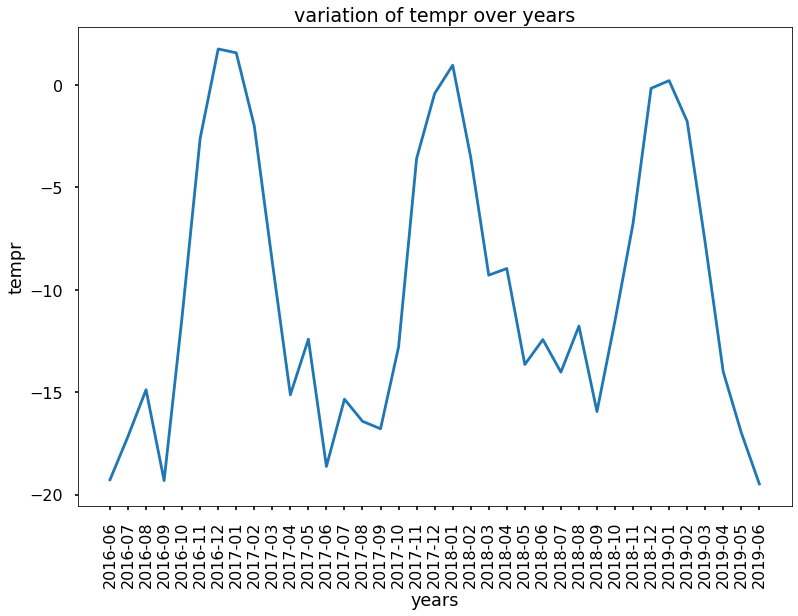

In [20]:
# plotting variation of temperature over years
plt.xlabel('years')
plt.ylabel('tempr')
plt.title('variation of tempr over years')
plt.xticks(rotation=90)
plt.plot(df2.tempr)

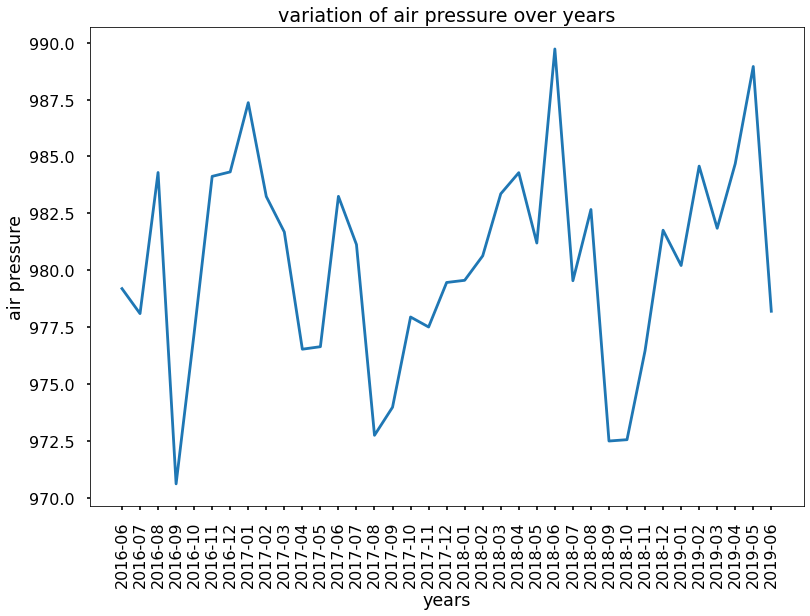

In [21]:
# plotting variation of air pressure over years
plt.xlabel('years')
plt.ylabel('air pressure')
plt.title('variation of air pressure over years')
plt.xticks(rotation=90)
plt.plot(df2.ap)

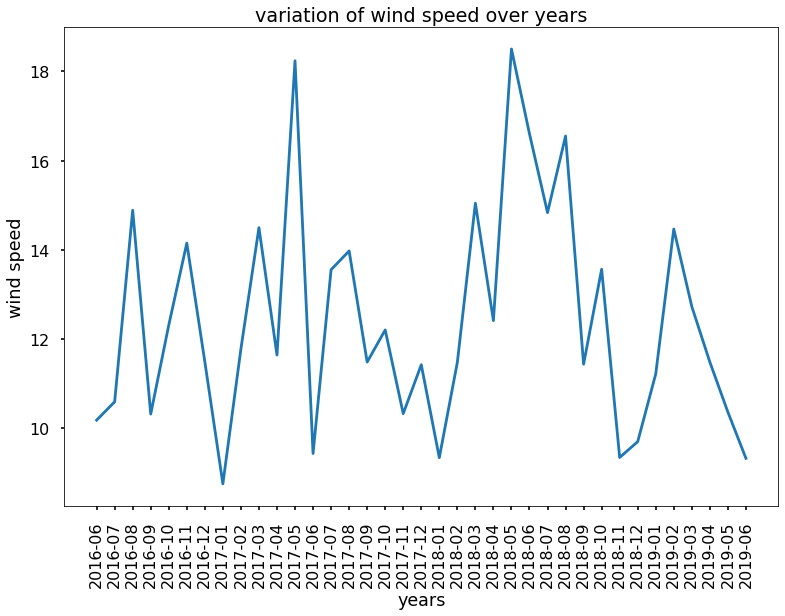

In [22]:
# plotting variation of wind speed over years
plt.xlabel('years')
plt.ylabel('wind speed')
plt.title('variation of wind speed over years')
plt.xticks(rotation=90)
plt.plot(df2.ws)

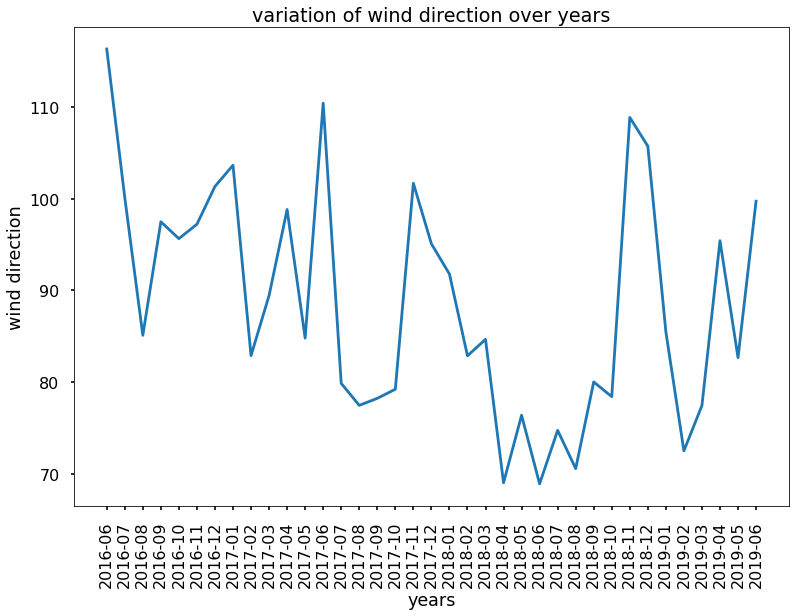

In [23]:
# plotting variation of wind direction over years
plt.xlabel('years')
plt.ylabel('wind direction')
plt.title('variation of wind direction over years')
plt.xticks(rotation=90)
plt.plot(df2.wd)

In [24]:
#variation of all parameters over years
df2.iplot(xaxis_title='time',yaxis_title='different parameters',title='variation of all parameters over years')

In [25]:
#variation of tempr over years without any smoothening
years = df['year'].unique()

df3 = df[['date','tempr']]
df3['date'] = pd.to_datetime(df3['date'], infer_datetime_format=True)
indexedDataset = df3.set_index(['date'])
from datetime import datetime
indexedDataset.head()

,tempr
date,
2016-06-02,-13.58
2016-06-02,-13.95
2016-06-02,-13.96
2016-06-02,-14.16
2016-06-02,-14.49


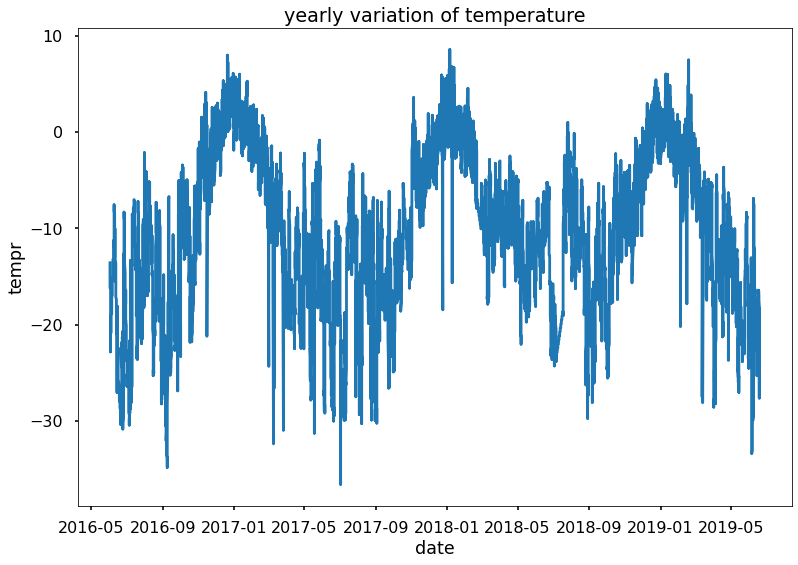

In [26]:
plt.xlabel('date')
plt.ylabel('tempr')
plt.title('yearly variation of temperature')
plt.plot(indexedDataset)

In [27]:
df4 = df2[['tempr']]
df4.head()

,tempr
year-month,
2016-06,-19.279069
2016-07,-17.160960
2016-08,-14.887245
2016-09,-19.319108
2016-10,-11.307218


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text major ticklabel objects>)

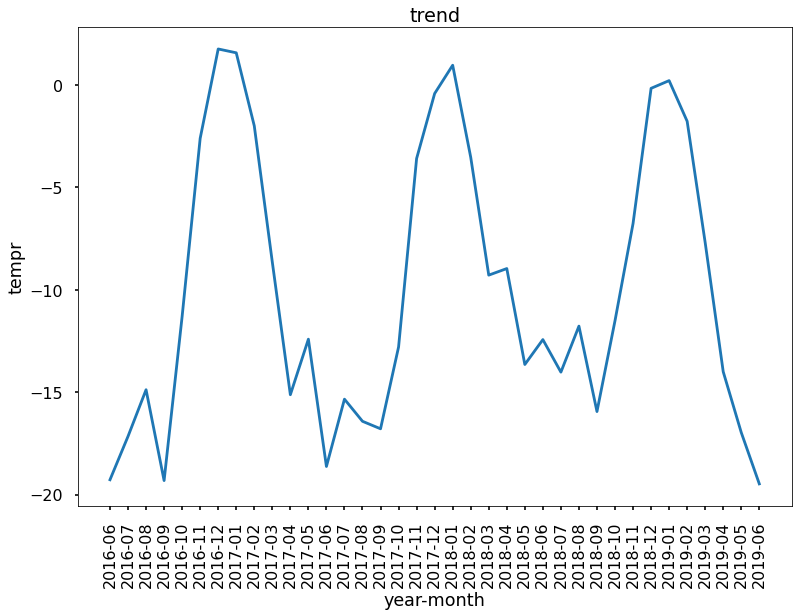

In [28]:
plt.plot(df4)
plt.title('trend')
plt.xlabel('year-month')
plt.ylabel('tempr')
plt.xticks(rotation=90)

In [29]:
#rolling statistics
rolmean = df4.rolling(window=12).mean()
rolstd = df4.rolling(window=12).std()

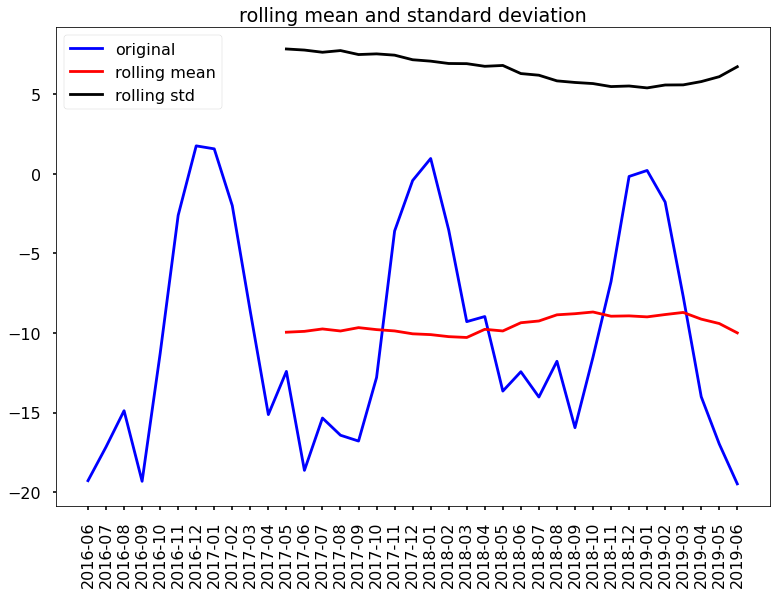

In [30]:
#plot rolling statistics
orig = plt.plot(df4, color='blue',label='original')
mean = plt.plot(rolmean, color='red',label='rolling mean')
orig = plt.plot(rolstd, color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.xticks(rotation=90)
plt.show(block=False)

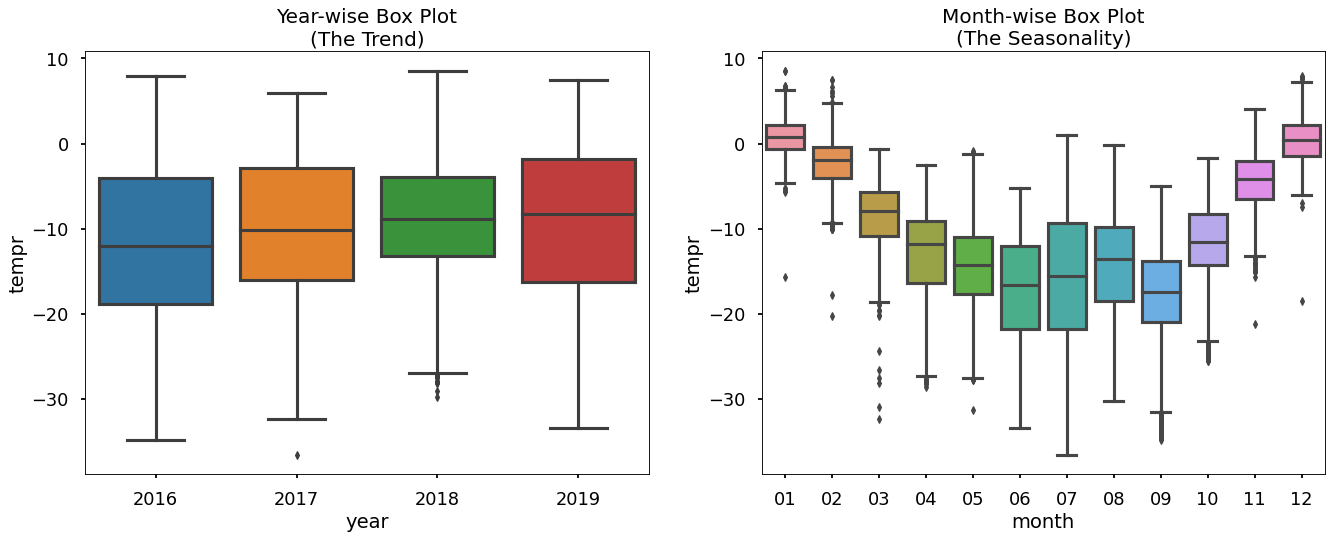

In [31]:
# Draw Box Plot for trend and seasonality
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='tempr', data=df, ax=axes[0])
sns.boxplot(x='month', y='tempr', data=df.loc[~df.year.isin([2015, 2019]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [32]:
df_group= df.groupby('date').mean()
df_group.head()

,tempr,ap,ws,wd,rh,blizzard
date,,,,,,
2016-06-02,-15.248333,968.283750,12.842500,69.541667,48.365417,0.0
2016-06-03,-19.657917,974.942083,6.930833,121.585417,66.595833,0.0
2016-06-04,-19.916250,984.413333,7.225000,107.748333,54.850000,0.0
2016-06-05,-17.990000,984.852500,8.725000,98.944583,57.661250,0.0
2016-06-06,-16.065000,985.291667,10.225000,90.141250,60.474167,0.0


Text(0.5, 1.0, 'Fourier transform for all the years')

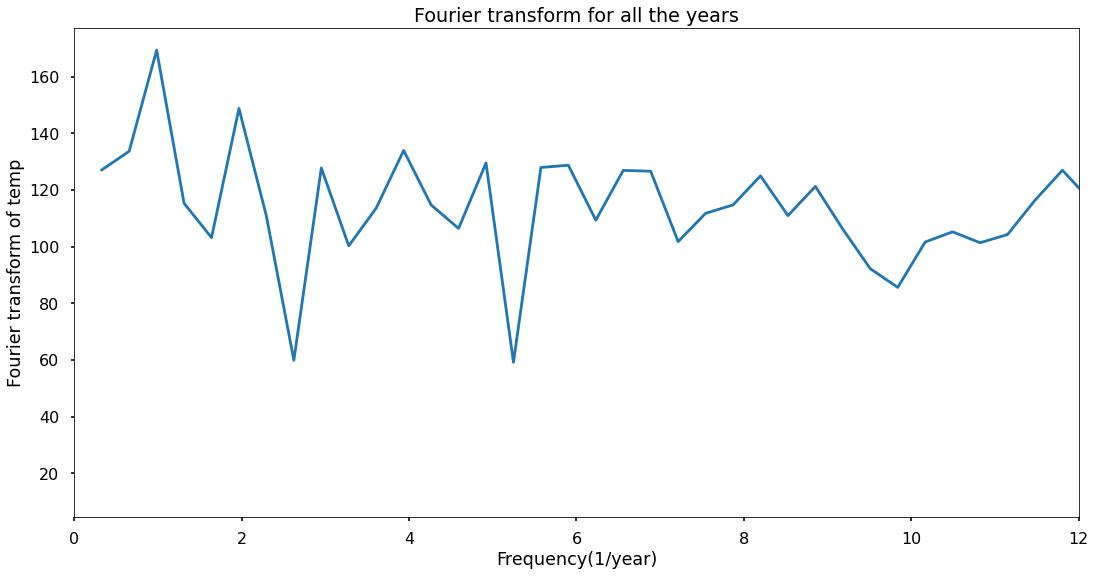

In [33]:
#plot fft for all years
import scipy as sp
import scipy.fftpack
date= pd.to_datetime(df_group.index)
temp= df_group['tempr']
N= len(temp)
temp_fft= sp.fftpack.fft(temp.tolist())
temppsd= np.abs(temp_fft)**2
fftfreq= sp.fftpack.fftfreq(len(temppsd), 1./365)
i= fftfreq>0
fig, ax= plt.subplots(1,1,figsize=(18,9))
ax.plot(fftfreq[i], 10*np.log(temppsd[i]))
ax.set_xlim(0,12)
ax.set_xlabel('Frequency(1/year)')
ax.set_ylabel('Fourier transform of temp')
ax.set_title('Fourier transform for all the years')

Text(0.5, 1.0, 'Fourier transform of temp for 2016')

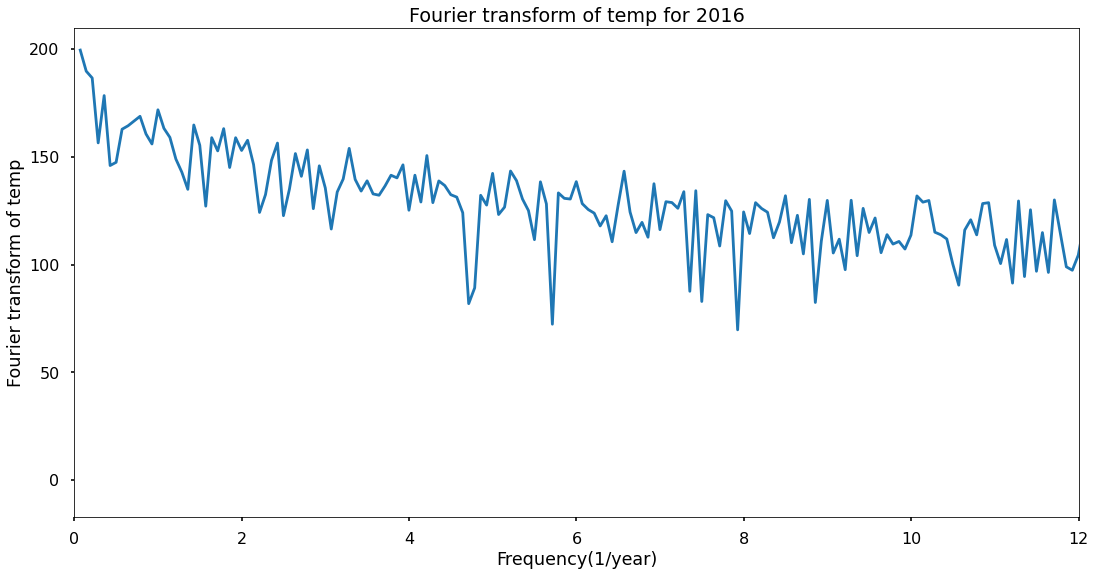

In [34]:
#plot fft year wise 2016
df_2016=df.loc[df['year']=='2016']
df_2016.head()
date= pd.to_datetime(df_2016.index)
temp= df_2016['tempr']
N= len(temp)
temp_fft= sp.fftpack.fft(temp.tolist())
temppsd= np.abs(temp_fft)**2
fftfreq= sp.fftpack.fftfreq(len(temppsd), 1./365)
i= fftfreq>0
fig, ax= plt.subplots(1,1,figsize=(18,9))
ax.plot(fftfreq[i], 10*np.log(temppsd[i]))
ax.set_xlim(0,12)
ax.set_xlabel('Frequency(1/year)')
ax.set_ylabel('Fourier transform of temp')
ax.set_title('Fourier transform of temp for 2016')


Text(0.5, 1.0, 'Fourier transform of temp for 2017')

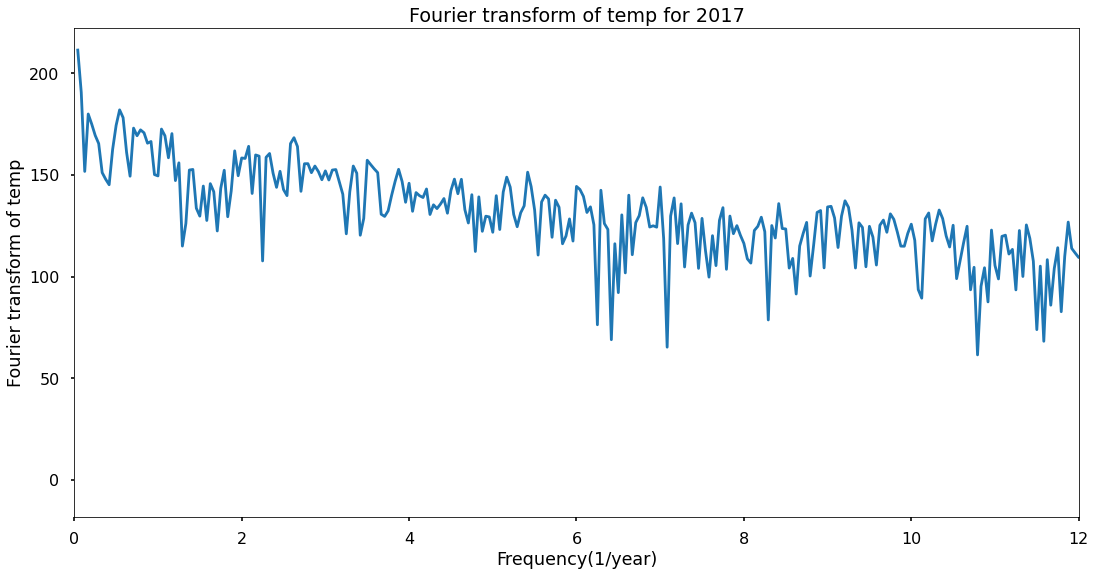

In [35]:
#plot fft year wise 2017
df_2017=df.loc[df['year']=='2017']
df_2017.head()
date= pd.to_datetime(df_2017.index)
temp= df_2017['tempr']
N= len(temp)
temp_fft= sp.fftpack.fft(temp.tolist())
temppsd= np.abs(temp_fft)**2
fftfreq= sp.fftpack.fftfreq(len(temppsd), 1./365)
i= fftfreq>0
fig, ax= plt.subplots(1,1,figsize=(18,9))
ax.plot(fftfreq[i], 10*np.log(temppsd[i]))
ax.set_xlim(0,12)
ax.set_xlabel('Frequency(1/year)')
ax.set_ylabel('Fourier transform of temp')
ax.set_title('Fourier transform of temp for 2017')


Text(0.5, 1.0, 'Fourier transform of temp for 2018')

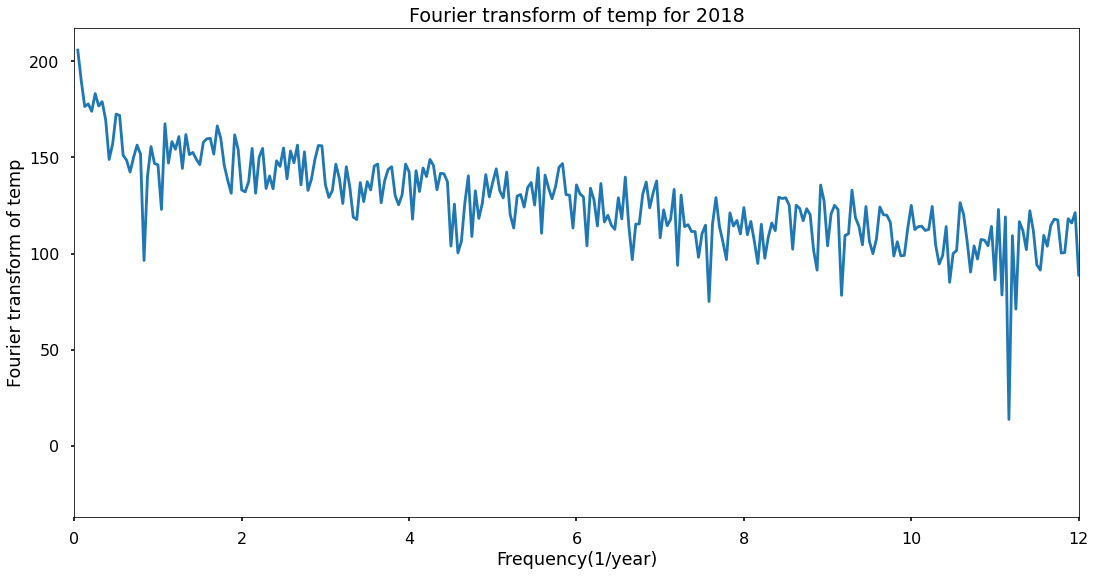

In [36]:
#plot fft year wise 2018
df_2018=df.loc[df['year']=='2018']
df_2018.head()
date= pd.to_datetime(df_2018.index)
temp= df_2018['tempr']
N= len(temp)
temp_fft= sp.fftpack.fft(temp.tolist())
temppsd= np.abs(temp_fft)**2
fftfreq= sp.fftpack.fftfreq(len(temppsd), 1./365)
i= fftfreq>0
fig, ax= plt.subplots(1,1,figsize=(18,9))
ax.plot(fftfreq[i], 10*np.log(temppsd[i]))
ax.set_xlim(0,12)
ax.set_xlabel('Frequency(1/year)')
ax.set_ylabel('Fourier transform of temp')
ax.set_title('Fourier transform of temp for 2018')


Text(0.5, 1.0, 'Fourier transform of temp for 2019')

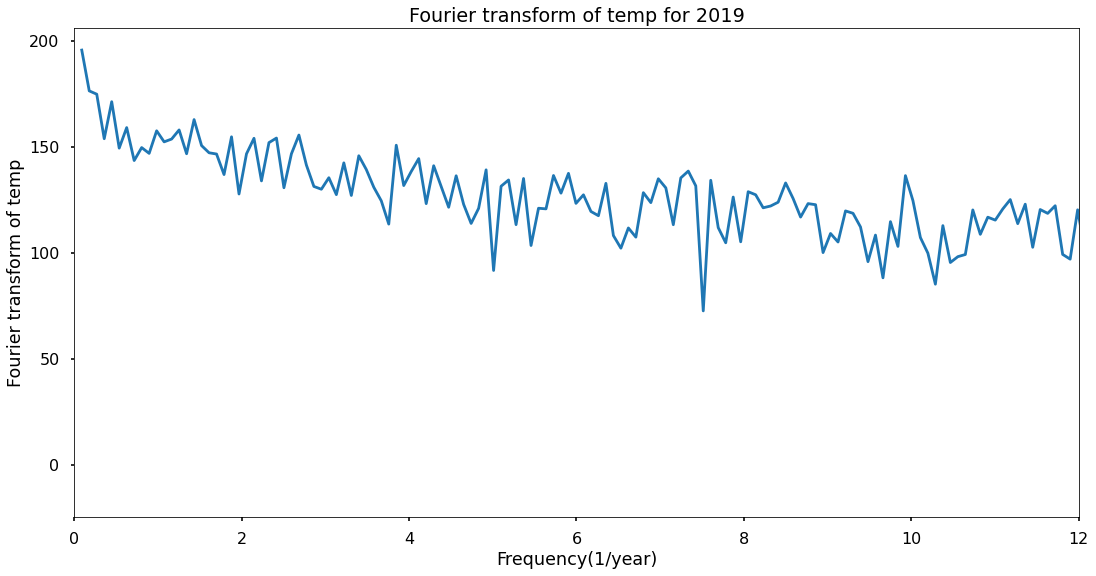

In [37]:
#plot fft year wise 2019
df_2019=df.loc[df['year']=='2019']
df_2019.head()
date= pd.to_datetime(df_2019.index)
temp= df_2019['tempr']
N= len(temp)
temp_fft= sp.fftpack.fft(temp.tolist())
temppsd= np.abs(temp_fft)**2
fftfreq= sp.fftpack.fftfreq(len(temppsd), 1./365)
i= fftfreq>0
fig, ax= plt.subplots(1,1,figsize=(18,9))
ax.plot(fftfreq[i], 10*np.log(temppsd[i]))
ax.set_xlim(0,12)
ax.set_xlabel('Frequency(1/year)')
ax.set_ylabel('Fourier transform of temp')
ax.set_title('Fourier transform of temp for 2019')


In [38]:
import scipy.io as sio
from scipy import fft, arange, signal
plt.style.use('seaborn-poster')
data= df.groupby('year-month', as_index=True).mean()
data.head()

,tempr,ap,ws,wd,rh,blizzard
year-month,,,,,,
2016-06,-19.279069,979.187132,10.180004,116.323661,60.651336,0.000000
2016-07,-17.160960,978.088140,10.592152,100.112268,65.826331,0.014577
2016-08,-14.887245,984.292366,14.886942,85.092137,54.145121,0.040559
2016-09,-19.319108,970.602457,10.316781,97.476260,57.374889,0.037037
2016-10,-11.307218,977.227339,12.311028,95.636680,58.260753,0.069959


In [39]:
#spearman correlation
corr_matrix=data.corr(method='spearman')
corr_matrix

,tempr,ap,ws,wd,rh,blizzard
tempr,1.000000,0.335704,-0.001897,0.047179,-0.282835,-0.311314
ap,0.335704,1.000000,0.178758,-0.124704,-0.252015,-0.446516
ws,-0.001897,0.178758,1.000000,-0.705073,-0.030820,0.157403
wd,0.047179,-0.124704,-0.705073,1.000000,0.047890,-0.078327
rh,-0.282835,-0.252015,-0.030820,0.047890,1.000000,0.473457
blizzard,-0.311314,-0.446516,0.157403,-0.078327,0.473457,1.000000


In [40]:
#pearson correlation
corr_matrix=data.corr(method='pearson')
corr_matrix

,tempr,ap,ws,wd,rh,blizzard
tempr,1.000000,0.327800,-0.137032,0.074773,-0.299141,-0.278081
ap,0.327800,1.000000,0.129819,-0.097687,-0.231778,-0.361198
ws,-0.137032,0.129819,1.000000,-0.660572,0.019586,0.335906
wd,0.074773,-0.097687,-0.660572,1.000000,-0.001481,-0.125487
rh,-0.299141,-0.231778,0.019586,-0.001481,1.000000,0.415040
blizzard,-0.278081,-0.361198,0.335906,-0.125487,0.415040,1.000000


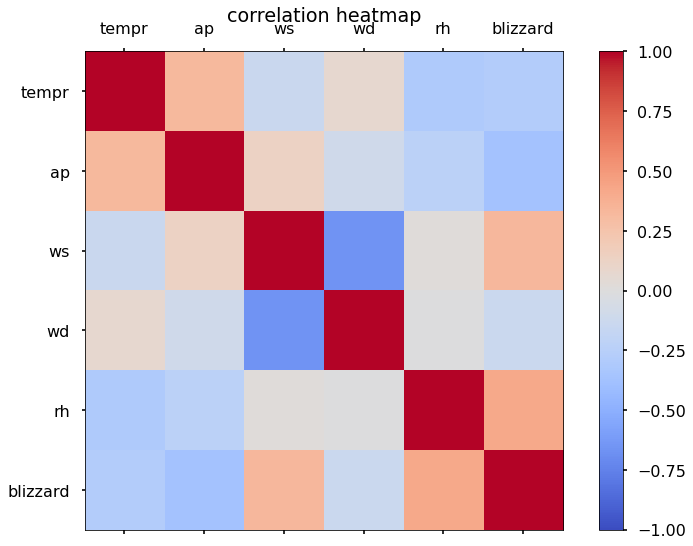

In [41]:
#correlation heatmap
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=0)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
ax.set_title('correlation heatmap')
plt.show()

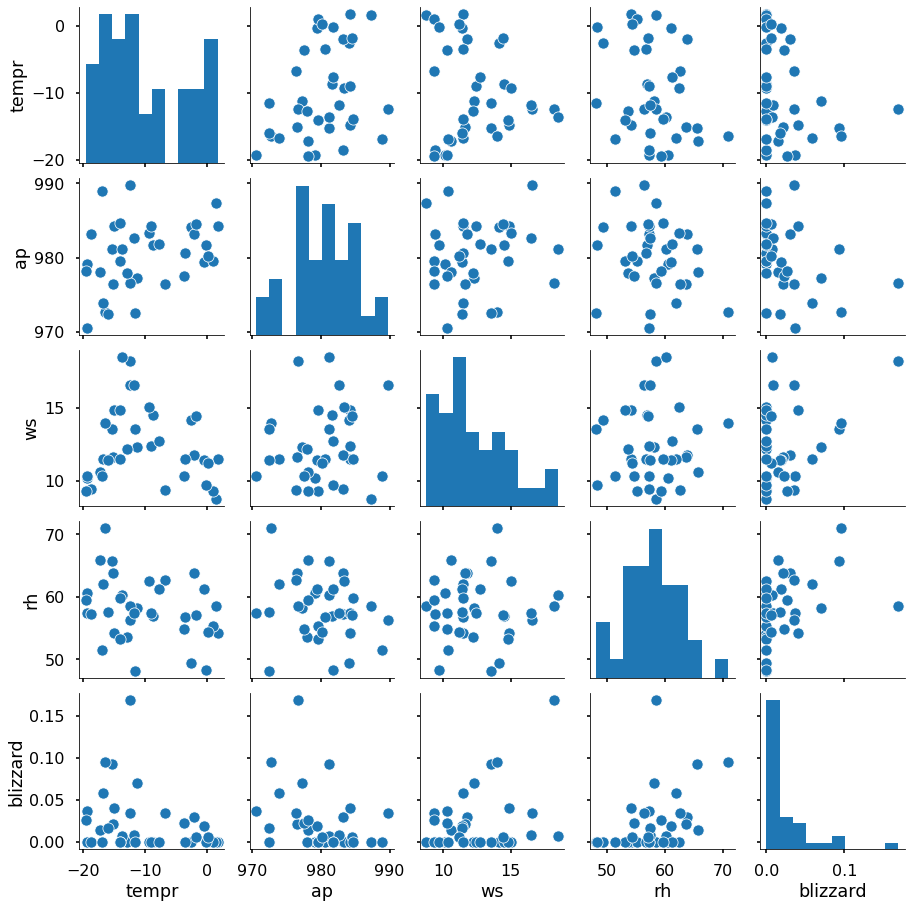

In [42]:
#scatter plot of all parameters
df = data[['tempr','ap','ws','rh','blizzard']]

sns.pairplot(df, kind="scatter")
plt.show()

c:\users\rakshit jain\appdata\local\programs\python\python38-32\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning:


The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.

c:\users\rakshit jain\appdata\local\programs\python\python38-32\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning:


The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.

c:\users\rakshit jain\appdata\local\programs\python\python38-32\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.

c:\users\rakshit jain\appdata\local\programs\python\python38-32\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



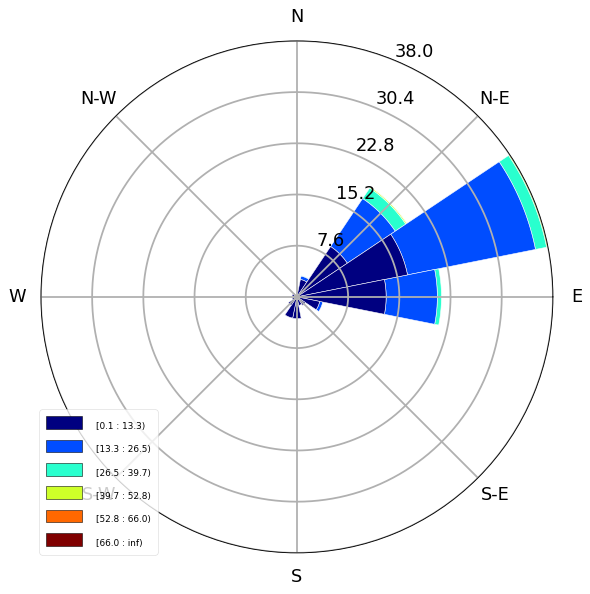

In [43]:
#plotting frequency windrose
from windrose import WindroseAxes
df1= pd.read_csv('C:/Users/rakshit jain/Downloads/inter-999.csv')
df1.head()
ax = WindroseAxes.from_ax()
ax.bar(df1.wd, df1.ws, normed=True, opening=1, edgecolor='white')
ax.set_legend()

In [44]:
df3=df2[['tempr']]
df3.head()

,tempr
year-month,
2016-06,-19.279069
2016-07,-17.160960
2016-08,-14.887245
2016-09,-19.319108
2016-10,-11.307218


<ipython-input-46-934e55ca031d>:6: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



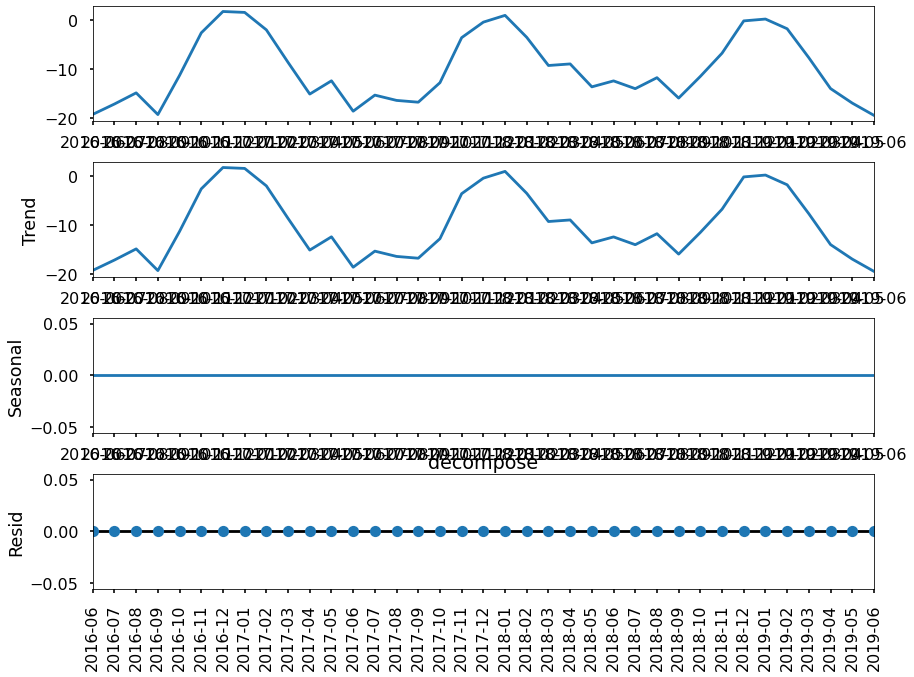

In [46]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = df3
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
plt.title('decompose')
plt.xticks(rotation=90)
pyplot.show()